In [1]:
# Make better use of Jupyter Notebook cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [19]:
# Import the usual suspects. Any new functions will be introduced individually for clarity.
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter, OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg' 
sns.set()

In [5]:
# Load training and validation data
X_tr = np.load('data/x_train.npy')
X_val = np.load('data/x_val.npy')

y_tr = np.load('data/y_tr.npy')
y_val = np.load('data/y_val.npy')

In [62]:
X_tr_nopop = X_tr[:, 1:]
X_val_nopop = X_val[:, 1:]

In [68]:
# get baseline logistic regression model:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1 = f1_score(lr.predict(X_val), y_val)
recall = recall_score(lr.predict(X_val), y_val)
print('f1 score: {} \nrecall score: {}'.format(f1, recall))

f1 score: 0.7010752688172043 
recall score: 0.7244444444444444


In [67]:
# get baseline random forest model
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_tr, y_tr)
f1 = f1_score(randomforest.predict(X_val), y_val)
recall = recall_score(randomforest.predict(X_val), y_val)
print('f1 score: {} \nrecall score: {}'.format(f1, recall))

f1 score: 0.9030303030303032 
recall score: 0.8764705882352941


In [66]:
# get baseline decision tree
decisiontree = DecisionTreeClassifier(max_depth=3)
decisiontree.fit(X_tr, y_tr)
f1 = f1_score(decisiontree.predict(X_val), y_val)
recall = recall_score(decisiontree.predict(X_val), y_val)
print('f1 score: {} \nrecall score: {}'.format(f1, recall))

f1 score: 0.7272727272727274 
recall score: 0.7134268537074149


In [11]:
# get baseline linear svm
linearsvc = LinearSVC()
linearsvc.fit(X_tr, y_tr)
f1 = f1_score(linearsvc.predict(X_val), y_val)
recall = recall_score(linearsvc.predict(X_val), y_val)
print('f1 score: {} \nrecall score: {}'.format(f1, recall))

f1 score: 0.7058823529411764 
recall score: 0.7252747252747253


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [51]:
# get baseline svm
svc = SVC(gamma='scale', probability=True)
svc.fit(X_tr, y_tr)
f1 = f1_score(svc.predict(X_val), y_val)
recall = recall_score(svc.predict(X_val), y_val)
print('f1 score: {} \nrecall score: {}'.format(f1, recall))

f1 score: 0.756923076923077 
recall score: 0.7454545454545455


In [52]:
# get baseline KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr, y_tr)
f1 = f1_score(knn.predict(X_val), y_val)
recall = recall_score(knn.predict(X_val), y_val)
print('f1 score: {} \nrecall score: {}'.format(f1, recall))

f1 score: 0.7261029411764705 
recall score: 0.649671052631579


# ROC Curves

In [53]:
models = [lr, randomforest, decisiontree, svc, knn]

In [54]:
# fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val)[:,1])

ROC AUC score =  0.7994184027777778
ROC AUC score =  0.9595117187500001
ROC AUC score =  0.799470486111111
ROC AUC score =  0.8317730034722222
ROC AUC score =  0.792146267361111


Text(0.5, 1.0, 'ROC curve for Predicting Police Shootings')

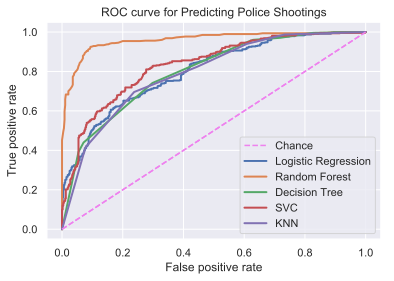

In [55]:
plt.plot([0,1],[0,1],c='violet',ls='--')
for model in models:
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:,1])
    plt.plot(fpr, tpr,lw=2)

    print("ROC AUC score = ", roc_auc_score(y_val, model.predict_proba(X_val)[:,1]))

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(['Chance', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'SVC', 'KNN'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Predicting Police Shootings')